In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('./googleplaystore.csv')

## Exploring the Data

### Getting familiar with the data

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape #Printing the shape of the dataset

(10841, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Getting the exact null value counts

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Data Cleaning 

In [8]:
#includes Type Conversion, dealing with NAN data, dropping duplicate data etc

### Type conversion of the columns - Reviews(num), Installs(num), Last_updated(datetime), Price(num)

In [9]:
df.loc[df['Type'] == 'Paid'].head() #Checking the type of values present in 'Price' column - need to remove the '$' sign to convert to num

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [10]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
# Converting the columns to the most suitable data types. errors='coerce' converts any unsupported value to NAN and proceeds to next value.
# errors='ignore' stops the conversion and restores the original type for the already converted values.
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') 
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format="%B %d, %Y", errors='coerce')
df['Price'] = pd.to_numeric(df['Price'].apply(lambda x: x.replace('$', '') if '$' in x else x), errors='coerce')

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### Updated column types

In [13]:
df.dtypes # All columns are now converted to the expected data types.

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                      object
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

#### Null values after coercing some of the values

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

### Dealing with NAN data

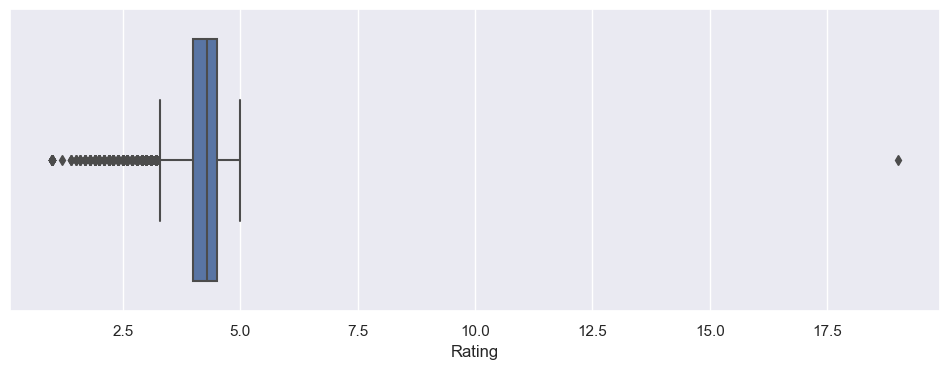

In [15]:
plt.figure(figsize=(12,4), dpi=100)
sns.boxplot(data=df, x='Rating')
plt.show();

In [16]:
df.describe()

,Rating,Reviews,Installs,Price
count,9367.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.193338,4.441529e+05,1.546434e+07,1.027368
std,0.537431,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


In [17]:
print(df['Rating'].mean())
print(df['Rating'].median())
print(df['Rating'].min())
print(df['Rating'].max())

4.193338315362448
4.3
1.0
19.0


#### Removing the outlier where rating = 19

In [18]:
df.loc[df['Rating'] == 19] #Outlier

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",NaT,4.0 and up,NaN


In [19]:
df.drop(index=(df.loc[df['Rating'] == 19]).index, inplace=True)

In [20]:
df.loc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49.0,4.0M,10000.0,Free,0.0,Everyone,Communication,2017-02-10,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,404k,100000.0,Free,0.0,Everyone,Personalization,2014-08-05,3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4.1M,10000000.0,Free,0.0,Everyone,Tools,2018-08-07,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37.0,14M,1000.0,Free,0.0,Everyone,Communication,2014-11-21,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132.0,2.6M,50000.0,Free,0.0,Everyone,Tools,2017-05-17,0.0.9,2.3 and up


#### Comparing the central tendencies now to earlier values

In [21]:
print(df['Rating'].mean())
print(df['Rating'].median())
print(df['Rating'].min())
print(df['Rating'].max())

4.191757420456978
4.3
1.0
5.0


#### Filling the Null rating values

In [22]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [23]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

#### FIlling the Null 'Type' column

In [24]:
df.loc[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.191757,0.0,Varies with device,0.0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [25]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [26]:
df['Type'] = df.apply(lambda x: "Free" if x['Price'] == 0 else "Paid", axis=1)

In [27]:
df.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                              4.19176
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated            2018-06-28 00:00:00
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [28]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [29]:
df['Type'].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

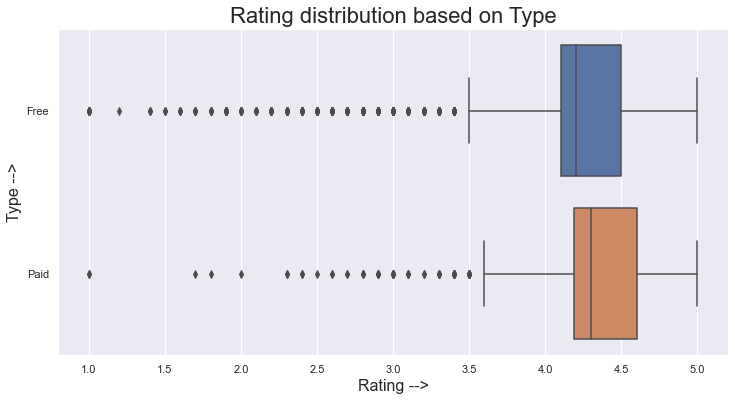

In [30]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Rating', y='Type')
plt.title('Rating distribution based on Type', fontsize=22)
plt.xlabel('Rating -->', fontsize=16)
plt.ylabel('Type -->', fontsize=16)
plt.show();

#### FIlling 'Current Ver' & 'Android Ver'

In [31]:
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [32]:
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode().iloc[0])
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode().iloc[0])

In [33]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Cleaning duplicate data

In [35]:
df.loc[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,Varies with device,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872.0,Varies with device,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991.0,Varies with device,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37M,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,Varies with device,1000000.0,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610.0,Varies with device,10000000.0,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370.0,Varies with device,1000000.0,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017.0,Varies with device,100000000.0,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123.0,86M,10000.0,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up


In [36]:
df = df.drop_duplicates()

In [37]:
df.shape

(10357, 13)